导入必要的包，设定sns图像格式

In [2]:
import pandas as pd
from keras.models import load_model
from PIL import Image, ImageOps
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
import os
%matplotlib inline
pd.options.display.notebook_repr_html=False  # 表格显示
plt.rcParams['figure.dpi'] = 75  # 图形分辨率
sns.set_theme(style='darkgrid')  # 图形主题

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow.python.eager'

加载模型

In [ ]:
model = load_model('keras_model.h5')
path = "./../archive/test-set/"
test_size = len(os.listdir(path))
test_data = np.ndarray(shape=(test_size, 224, 224, 3), dtype=np.float32)
test_pokemon_name = []
re_han = re.compile("[0-9]*?px.*?([A-Za-z-]*?).jpg")
pokemon_image_path = []

: 

获取测试集

In [18]:
count = 0
for image_name in os.listdir(path):     # 获取每个测试图片
    image_path = os.path.join(path, image_name)
    image_ = Image.open(image_path)
    pokemon_image_path.append(image_path)
    image_ = image_.convert('RGB')
    size = (224, 224)
    image_ = ImageOps.fit(image_, size, Image.ANTIALIAS)
    image_array = array(image_)
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
    pokemon_name = re.match(re_han, image_name).group(1)
    test_pokemon_name.append(pokemon_name)
    # print(test_data.shape())
    test_data[count] = normalized_image_array
    count += 1

In [19]:
prediction = model.predict(test_data)
classify_dict = {}
with open("./labels.txt", "r") as r:
    lines = r.readlines()

for line in lines:
    classify_dict[int(line[0])] = line[2:].strip()


可视化测试集输出概率

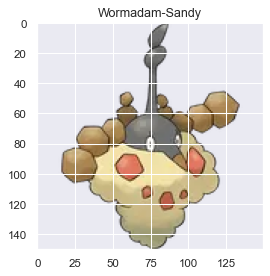

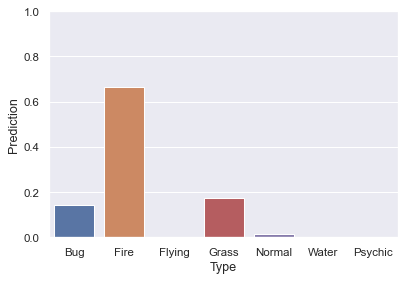

Wormadam-Sandy's type prediction is
Bug:14.33%
Fire:66.23%
Flying:0.01%
Grass:17.55%
Normal:1.64%
Water:0.01%
Psychic:0.22%


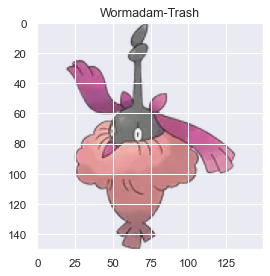

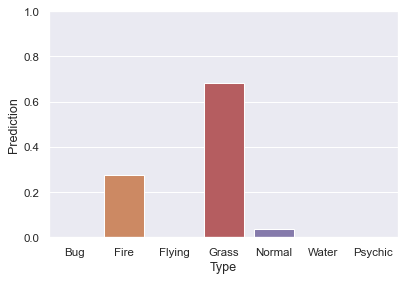

Wormadam-Trash's type prediction is
Bug:0.21%
Fire:27.74%
Flying:0.06%
Grass:68.06%
Normal:3.68%
Water:0.00%
Psychic:0.25%


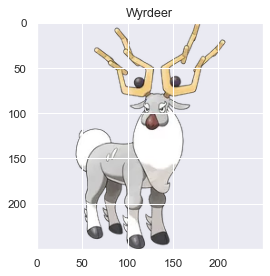

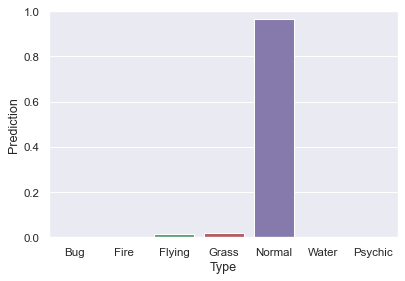

Wyrdeer's type prediction is
Bug:0.12%
Fire:0.04%
Flying:1.63%
Grass:1.78%
Normal:96.32%
Water:0.01%
Psychic:0.09%


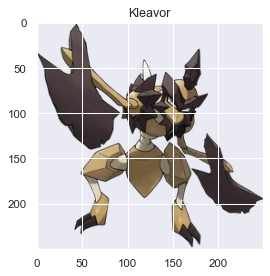

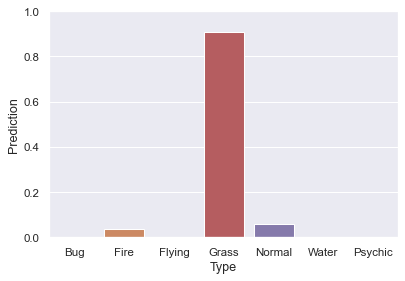

Kleavor's type prediction is
Bug:0.10%
Fire:3.58%
Flying:0.02%
Grass:90.49%
Normal:5.81%
Water:0.00%
Psychic:0.00%


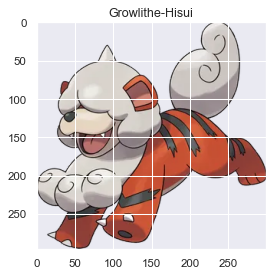

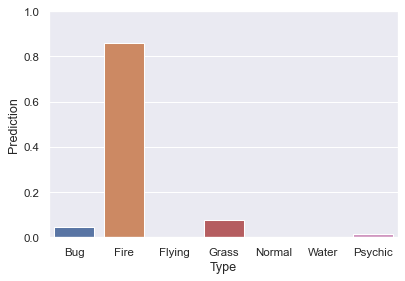

Growlithe-Hisui's type prediction is
Bug:4.60%
Fire:85.95%
Flying:0.36%
Grass:7.70%
Normal:0.00%
Water:0.00%
Psychic:1.39%


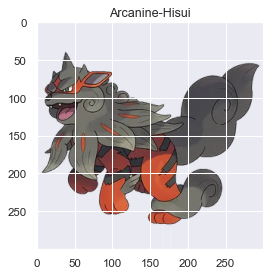

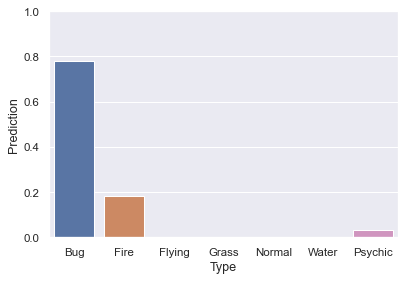

Arcanine-Hisui's type prediction is
Bug:78.03%
Fire:18.49%
Flying:0.21%
Grass:0.03%
Normal:0.04%
Water:0.00%
Psychic:3.20%


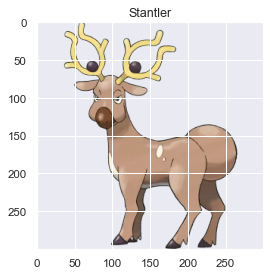

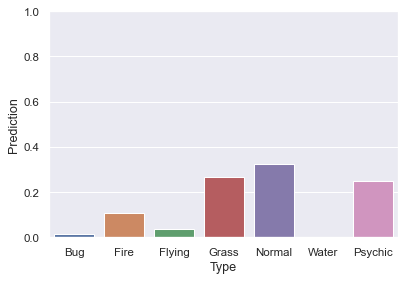

Stantler's type prediction is
Bug:1.37%
Fire:10.81%
Flying:3.69%
Grass:26.79%
Normal:32.44%
Water:0.00%
Psychic:24.90%


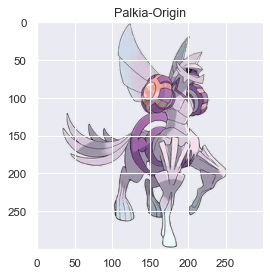

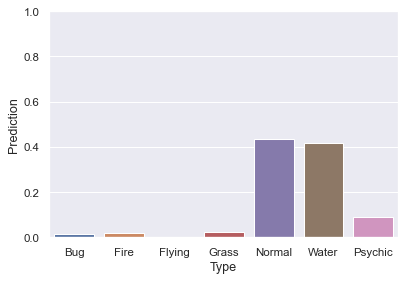

Palkia-Origin's type prediction is
Bug:1.34%
Fire:1.80%
Flying:0.18%
Grass:2.52%
Normal:43.25%
Water:41.78%
Psychic:9.13%


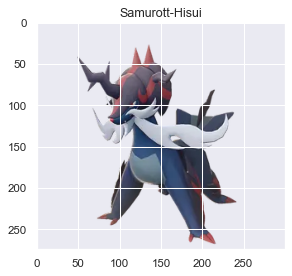

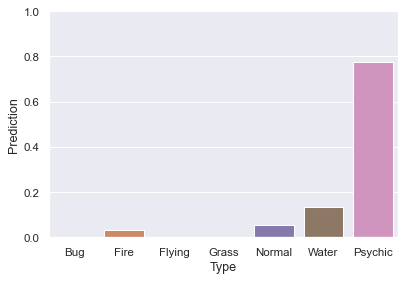

Samurott-Hisui's type prediction is
Bug:0.14%
Fire:3.16%
Flying:0.05%
Grass:0.00%
Normal:5.56%
Water:13.43%
Psychic:77.66%


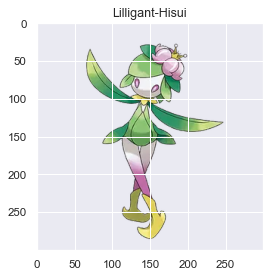

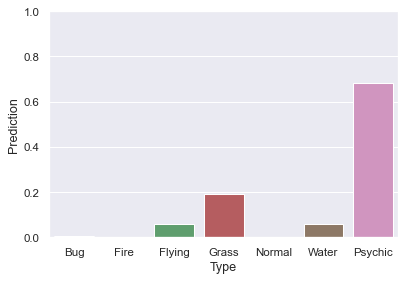

Lilligant-Hisui's type prediction is
Bug:0.47%
Fire:0.01%
Flying:5.93%
Grass:19.07%
Normal:0.00%
Water:6.14%
Psychic:68.39%


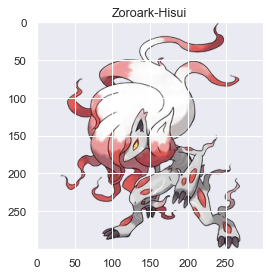

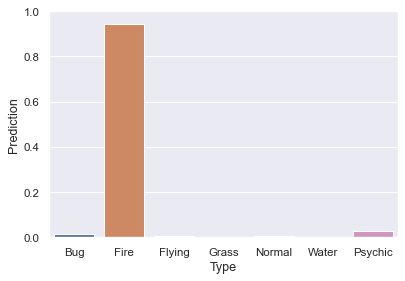

Zoroark-Hisui's type prediction is
Bug:1.72%
Fire:94.30%
Flying:0.62%
Grass:0.00%
Normal:0.55%
Water:0.00%
Psychic:2.81%


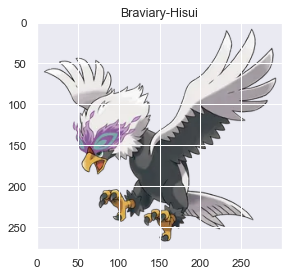

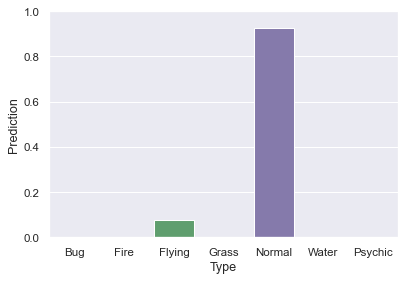

Braviary-Hisui's type prediction is
Bug:0.00%
Fire:0.02%
Flying:7.53%
Grass:0.00%
Normal:92.44%
Water:0.00%
Psychic:0.00%


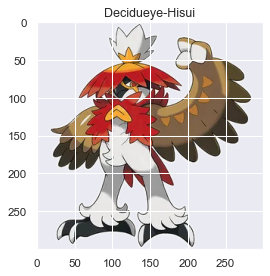

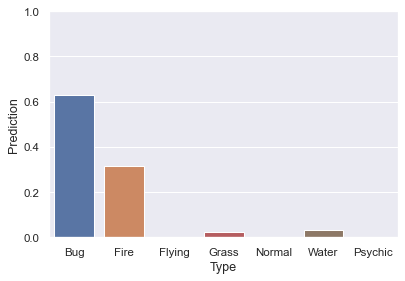

Decidueye-Hisui's type prediction is
Bug:62.77%
Fire:31.66%
Flying:0.12%
Grass:2.36%
Normal:0.00%
Water:3.07%
Psychic:0.01%


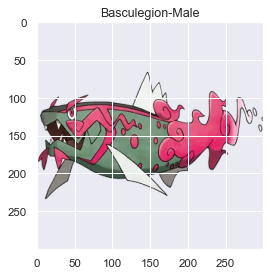

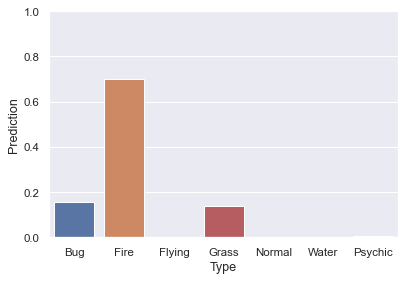

Basculegion-Male's type prediction is
Bug:15.46%
Fire:69.89%
Flying:0.24%
Grass:13.87%
Normal:0.00%
Water:0.00%
Psychic:0.54%


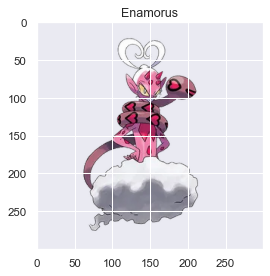

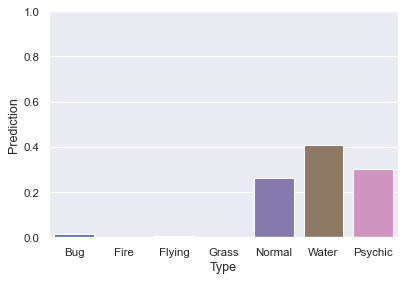

Enamorus's type prediction is
Bug:1.66%
Fire:0.17%
Flying:0.58%
Grass:0.03%
Normal:26.42%
Water:40.89%
Psychic:30.25%


In [21]:
for idx in range(len(prediction)):
    i = 0
    img = Image.open(pokemon_image_path[idx])
    plt.title(test_pokemon_name[idx])
    plt.imshow(img)
    plt.show()
    df = pd.DataFrame({"Type": list(classify_dict.values()), "Prediction": prediction[idx]})
    plt.ylim(0, 1)
    sns.barplot(data=df, x="Type", y='Prediction')
    plt.show()
    print(f"{test_pokemon_name[idx]}'s type prediction is")
    for p in prediction[idx]:
        print('{}:{:.2%}'.format(classify_dict[i], p))
        i += 1